### Import library

In [292]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import matplotlib.pyplot as plt

In [293]:
female_df = pd.read_pickle('preprocessed_data/female_self_data.pkl')
male_df = pd.read_pickle('preprocessed_data/male_self_data.pkl')
match_df = pd.read_pickle('preprocessed_data/match_data.pkl')

### Implement the model
1. According to personal features, grouping the people
2. Analysis the preferance for that group of people
3. For test data, classify the person according to the cluster results
4. Using perferance in step 2 to justify whether the date could success

#### Preproccessing

In [294]:
additional_train = ['interests_correlate']

female_df.drop(labels=['race', 'field'], axis=1)
male_df.drop(labels=['race', 'field'], axis=1)

# divide the data into training and test part
female_train, female_test = train_test_split(female_df, test_size=0.1, random_state=0)
# male_train, male_test = train_test_split(male_df, test_size=0.1, random_state=0)

### Clustering

In [295]:
#Remove categorical values
# features = female_train.drop(labels=['race', 'field'], axis=1)
n_features = len(female_train.columns)
std_scaler = StandardScaler()
normalized_features = std_scaler.fit_transform(female_train)
min_max_scaler = MinMaxScaler()
normalized_features = min_max_scaler.fit_transform(normalized_features)
print(normalized_features.shape)

(246, 38)


#### NMF

In [296]:
# Cross verification
kf = KFold(n_splits=5, shuffle=True, random_state=42)

n_components_range = range(1, 11) # verify range
best_n_components = 0
best_score = float('inf')

# iterate different number of n_components
avg_scores = []
for n_components in n_components_range:
    scores = []

    for train_index, test_index in kf.split(normalized_features):
        X_train, X_test = normalized_features[train_index], normalized_features[test_index]

        model = NMF(n_components=n_components, init='random', random_state=42)
        W = model.fit_transform(X_train)
        H = model.components_

        X_train_reconstructed = np.dot(W, H)
        X_test_reconstructed = np.dot(model.transform(X_test), H)

        score = mean_squared_error(X_test, X_test_reconstructed)
        scores.append(score)

    avg_score = np.mean(scores)
    avg_scores.append(avg_score)

    print(f"Components: {n_components}, Score: {avg_score}")

    if avg_score < best_score:
        best_score = avg_score
        best_n_components = n_components

print(f"Best number of components: {best_n_components}, Best score: {best_score}")

Components: 1, Score: 0.04128632942595829
Components: 2, Score: 0.03712592638902879
Components: 3, Score: 0.03395417191730056
Components: 4, Score: 0.030261875552512484
Components: 5, Score: 0.028079290863493745


d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to imp

Components: 6, Score: 0.025842817647008964
Components: 7, Score: 0.02415579219650326
Components: 8, Score: 0.022650875754654045
Components: 9, Score: 0.021086041395827485


d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to imp

Components: 10, Score: 0.019285850244854692
Best number of components: 10, Best score: 0.019285850244854692


d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to imp

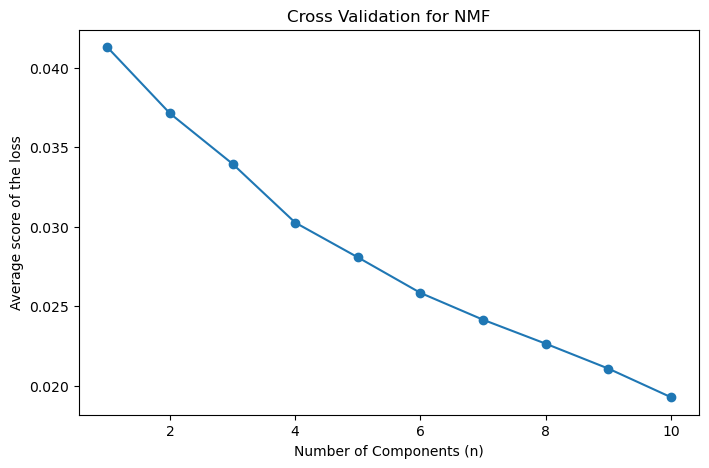

In [297]:
# draw the n_components vs avg_score
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, avg_scores, marker='o')
plt.xlabel('Number of Components (n)')
plt.ylabel('Average score of the loss')
plt.title('Cross Validation for NMF')
plt.show()

In [298]:
nmf_model = NMF(n_components=3, init='random', random_state=0)  # 3
W = nmf_model.fit_transform(normalized_features)
H = nmf_model.components_
print(W.shape)
print(H.shape)

(246, 3)
(3, 38)


d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


#### PCA

In [299]:
# Cross verification
best_n_components = 0
best_score = float('inf')

# iterate different number of n_components
avg_scores = []
for n_components in n_components_range:
    scores = []

    for train_index, test_index in kf.split(normalized_features):
        X_train, X_test = normalized_features[train_index], normalized_features[test_index]

        model = PCA(n_components=n_components, random_state=42)
        X_train_reduced = model.fit_transform(X_train)
        X_test_reduced = model.transform(X_test)
        X_test_reconstructed = model.inverse_transform(X_test_reduced)

        score = mean_squared_error(X_test, X_test_reconstructed)
        scores.append(score)

    avg_score = np.mean(scores)
    avg_scores.append(avg_score)

    print(f"Components: {n_components}, Score: {avg_score}")

    if avg_score < best_score:
        best_score = avg_score
        best_n_components = n_components

print(f"Best number of components: {best_n_components}, Best score: {best_score}")

Components: 1, Score: 0.0409718752634911
Components: 2, Score: 0.03621703015525853
Components: 3, Score: 0.032816000860238254
Components: 4, Score: 0.02933322306636
Components: 5, Score: 0.026735410859834708
Components: 6, Score: 0.024900099993866477
Components: 7, Score: 0.02324620991591608
Components: 8, Score: 0.02157886647411462
Components: 9, Score: 0.020190009971783152
Components: 10, Score: 0.018675804306282233
Best number of components: 10, Best score: 0.018675804306282233


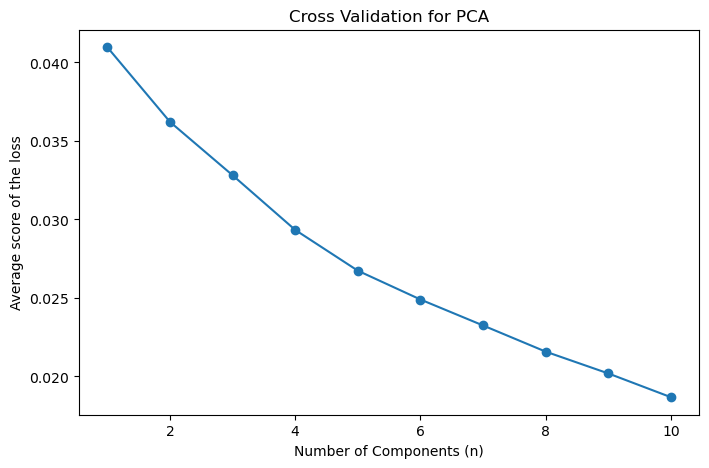

In [300]:
# draw the n_components vs avg_score
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, avg_scores, marker='o')
plt.xlabel('Number of Components (n)')
plt.ylabel('Average score of the loss')
plt.title('Cross Validation for PCA')
plt.show()

In [301]:
pca_model = PCA(n_components=5, random_state=0)  # 5
feature_reduced = pca_model.fit_transform(normalized_features)
print(feature_reduced.shape)
# W = feature_reduced

(246, 5)


#### K-means

d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

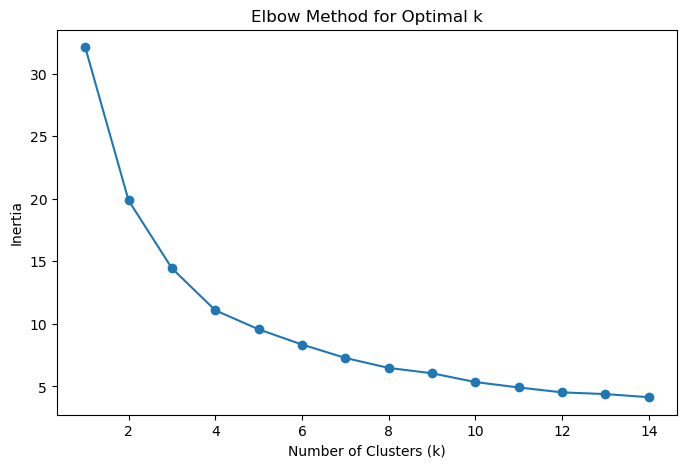

In [302]:
# use elbow method
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # kmeans.fit(normalized_features)
    kmeans.fit(W)
    inertia.append(kmeans.inertia_)

# draw the elbow figure
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [303]:
# kmeans
k = 4
cluster_model = KMeans(n_clusters=k, random_state=42)
cluster_model.fit(W)

d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

#### Hierarchical Clustering

In [304]:
# Hierarchical Clustering
# k = 5
# cluster_model = AgglomerativeClustering(n_clusters=k, linkage='average')
# cluster_model.fit(normalized_features)

In [305]:
# get the result labels
print(len(cluster_model.labels_))
female_train['cluster'] = cluster_model.labels_

246


### Select the correspoding male for each group of female

In [306]:
# A dictionary that stores training data for each group
dic_X = {}
dic_y = {}
dic_y_decision = {} # also train classifier for attribute "decision"
train_data_coloumns = list(male_df.columns) + additional_train
# print(train_data_coloumns)

for i in range(k):
    dic_X[i] = pd.DataFrame(columns=train_data_coloumns)
    dic_y[i] = []
    dic_y_decision[i] = []

    female_group = female_train[female_train['cluster'] == i]
    for index, row in female_group.iterrows():
        male_group = match_df.loc[match_df['female_id'] == index]
        # print(male_group)
        combined_group = male_df.loc[male_group['male_id']]
        combined_group[additional_train] = male_group[additional_train].values
        # print(combined_group)

        dic_X[i] = pd.concat([dic_X[i], combined_group])
        dic_y[i].extend(male_group['match'].tolist())
        dic_y_decision[i].extend(male_group['decision'].tolist())

print(dic_X.keys())
print(dic_X[0].shape)
# print(dic_X[0].dtypes)
# print(dic_X[0].iloc[0])
print(len(dic_y[0]))
print(len(dic_y_decision[0]))
# print(dic_y[0])

print("Count each group's number of training samples:")
for i in range(k):
    print(len(dic_y[i]))

C:\Users\nemuru\AppData\Local\Temp\ipykernel_3936\2729985166.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dic_X[i] = pd.concat([dic_X[i], combined_group])
C:\Users\nemuru\AppData\Local\Temp\ipykernel_3936\2729985166.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dic_X[i] = pd.concat([dic_X[i], combined_group])
C:\Users\nemuru\AppData\Local\Temp\ipykernel_3936\2729985166.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fu

dict_keys([0, 1, 2, 3])
(1047, 39)
1047
1047
Count each group's number of training samples:
1047
880
586
1262


### Classification for every label
#### Feature "match"

In [307]:
# baseline
dclf = DummyClassifier(strategy='most_frequent', random_state=0)

# build the pipeline for baseline
pipeline_baseline = Pipeline([
    ('standard_scaler', StandardScaler()),  # standardize
    ('minmax_scaler', MinMaxScaler()),      # normalize
    ('baseline', dclf)         # random guessing baseline
])

baseline_models = {}
for i in range(k):
    baseline_models[i] = pipeline_baseline.fit(dic_X[i], dic_y[i]) # train the model

In [308]:
# decision tree
pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=0))  # dt
])

# hyper-parameters grid
param_grid_dt = {
    'dt__max_depth': [None, 10, 20, 30, 40],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

In [309]:
# random forest
pipeline_rmforest = Pipeline([
    ('scaler', StandardScaler()),                    # standardize
    ('rf', RandomForestClassifier(random_state=42))  # random forest
])
# pipeline_rmforest = ImbPipeline([
#     ('smote', SMOTE(random_state=42)),               # SMOTE 进行过采样
#     ('scaler', StandardScaler()),                    # standardize
#     ('rf', RandomForestClassifier(random_state=42))  # random forest
# ])

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

In [310]:
# SVM
# pipeline_svm = ImbPipeline([
#     ('smote', SMOTE(random_state=42)),      # SMOTE 进行过采样
#     ('standard_scaler', StandardScaler()),  # standardize
#     ('minmax_scaler', MinMaxScaler()),      # normalize
#     ('svm', SVC(random_state=42, max_iter=10000))           # svm
# ])
pipeline_svm = Pipeline([
    ('standard_scaler', StandardScaler()),  # standardize
    ('minmax_scaler', MinMaxScaler()),      # normalize
    ('svm', SVC(random_state=42, max_iter=10000))           # svm
])

# hyper-parameters grid
param_grid_svm = {
    'svm__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
# param_grid = {
#     'svm__C': [0.1, 1, 10],
#     'svm__kernel': ['linear', 'rbf'],
#     'svm__gamma': ['scale', 'auto']
# }

In [311]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)
nested_scores = np.zeros(k)

models = {}
for i in range(k):
    # using grid search and cross validation
    models[i] = GridSearchCV(pipeline_rmforest, param_grid_rf, cv=5, scoring='accuracy', 
                             n_jobs=-1, verbose=True)
    models[i].fit(dic_X[i], dic_y[i]) # train the model

    nested_score = cross_val_score(models[i], X=dic_X[i], y=dic_y[i], cv=outer_cv)
    nested_scores[i] = nested_score.mean()

    # output the best parameter and score
    print("Best Parameter:", models[i].best_params_)
    print("Best Score:", models[i].best_score_)
    print("Nested Score:", nested_score.mean())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameter: {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best Score: 0.8471998177261335
Nested Score: 0.849997721576669
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameter: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_sa

#### Feature "decision"

In [312]:
baseline_models_decision = {}
for i in range(k):
    baseline_models_decision[i] = pipeline_baseline.fit(dic_X[i], dic_y_decision[i]) # train the model

In [313]:
nested_scores_decision = np.zeros(k)

models_decision = {}
for i in range(k):
    # using grid search and cross validation
    models_decision[i] = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy', 
                                      n_jobs=-1, verbose=True)
    models_decision[i].fit(dic_X[i], dic_y_decision[i]) # train the model

    nested_score = cross_val_score(models_decision[i], X=dic_X[i], y=dic_y_decision[i], cv=outer_cv)
    nested_scores_decision[i] = nested_score.mean()

    # output the best parameter and score
    print("Best Parameter:", models_decision[i].best_params_)
    print("Best Score:", models_decision[i].best_score_)
    print("Nested Score:", nested_score.mean())

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameter: {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score: 0.6342128047391207
Nested Score: 0.6313192071086808
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameter: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'sigmoid'}
Best Score: 0.6625
Nested Score: 0.65113

d:\Programming\anaconda3\envs\esl_env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameter: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Score: 0.7388816456613068
Nested Score: 0.7303925829349558
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameter: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Score: 0.7060323734236779
Nested Score: 0.6965305226174792


### Test the models

In [314]:
#Remove categorical values
# test_features = female_test.drop(labels=['race', 'field'], axis=1)
n_test_features = len(female_test.columns)
normalized_test_features = std_scaler.fit_transform(female_test)
normalized_test_features = min_max_scaler.fit_transform(normalized_test_features)
print(normalized_test_features.shape)

(28, 38)


#### NMF + K-means

In [315]:
W_test = nmf_model.transform(normalized_test_features)
# W_test = pca_model.transform(normalized_test_features)
predictions = cluster_model.predict(W_test)
print(predictions.shape)

(28,)


#### Hierarchical Clustering

In [316]:
# predictions = cluster_model.fit_predict(normalized_test_features)
# print(predictions.shape)

#### Get the cluster for each test data

In [317]:
female_test['cluster'] = predictions
# print(female_test['cluster'])

#### Feature "match"
Baseline model

In [318]:
base_total = 0
base_true_positive = 0
# base_true_positive = []
for index, row in female_test.iterrows():
    group_num = row['cluster']
    male_id_match = match_df.loc[match_df['female_id'] == index]
    # print(male_id_match.shape)
    male_test = male_df.loc[male_id_match['male_id']]
    male_test[additional_train] = male_id_match[additional_train].values

    male_predictions = baseline_models[group_num].predict(male_test)
    base_total += male_id_match.shape[0]
    base_true_positive += accuracy_score(male_id_match['match'].tolist(), male_predictions)

    # score = baseline_models[group_num].score(male_test, male_id_match['match'].tolist())
    # print(score)
    # base_true_positive.append(score)
    

# predict the baseline model on the test dataset
accuracy = base_true_positive / base_total
# print(len(base_true_positive))
# accuracy = base_true_positive.mean()
print("Accuracy of the model:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model: 0.05336099008728013


In [319]:
total = 0
true_positive = 0
for index, row in female_test.iterrows():
    group_num = row['cluster']
    male_id_match = match_df.loc[match_df['female_id'] == index]
    # print(male_id_match.shape)
    male_test = male_df.loc[male_id_match['male_id']]
    male_test[additional_train] = male_id_match[additional_train].values

    male_predictions = models[group_num].predict(male_test)
    # print(male_predictions.shape)
    # print(len(male_id_match['match'].tolist()))
    total += male_id_match.shape[0]
    true_positive += accuracy_score(male_id_match['match'].tolist(), male_predictions)
    # print(male_id_match['match'].tolist())
    # print(male_predictions)
    
    if not (male_predictions == 0).all().any():
        print(male_id_match['match'].tolist())
        print(male_predictions)
    
# predict the model on the test dataset
accuracy = true_positive / total
print("Accuracy of the model:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
[0 0 1 0 0 0 0 0 0 0 1 0 1 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
[0 0 0 1 0 0 0 0 1 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0 0 0 1 0 0 1 0 0 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[0 0 0 1 0 0 1 0

#### Feature "decision"
Baseline model

In [320]:
base_total = 0
base_true_positive = 0
# base_true_positive = []
for index, row in female_test.iterrows():
    group_num = row['cluster']
    male_id_match = match_df.loc[match_df['female_id'] == index]
    # print(male_id_match.shape)
    male_test = male_df.loc[male_id_match['male_id']]
    male_test[additional_train] = male_id_match[additional_train].values

    male_predictions = baseline_models_decision[group_num].predict(male_test)
    base_total += male_id_match.shape[0]
    base_true_positive += accuracy_score(male_id_match['decision'].tolist(), male_predictions)

    # score = baseline_models_decision[group_num].score(male_test, male_id_match['match'].tolist())
    # print(score)
    # base_true_positive.append(score)
    

# predict the baseline model on the test dataset
accuracy = base_true_positive / base_total
# print(len(base_true_positive))
# accuracy = base_true_positive.mean()
print("Accuracy of the model:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model: 0.040200147512591204


In [321]:
total = 0
true_positive = 0
for index, row in female_test.iterrows():
    group_num = row['cluster']
    male_id_match = match_df.loc[match_df['female_id'] == index]
    # print(male_id_match.shape)
    male_test = male_df.loc[male_id_match['male_id']]
    male_test[additional_train] = male_id_match[additional_train].values

    male_predictions = models_decision[group_num].predict(male_test)
    # print(male_predictions.shape)
    # print(len(male_id_match['match'].tolist()))
    total += male_id_match.shape[0]
    true_positive += accuracy_score(male_id_match['decision'].tolist(), male_predictions)
    # print(male_id_match['match'].tolist())
    # print(male_predictions)
    
    if not (male_predictions == 0).all().any():
        print(male_id_match['decision'].tolist())
        print(male_predictions)
    
# predict the model on the test dataset
accuracy = true_positive / total
print("Accuracy of the model:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[1 1 1 1 1 0 1 0 1 1 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0]
[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
[0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0]
[0, 1, 0, 0, 0, 1, 0, 1, 1]
[0 1 0 0 0 0 0 0 1]
[1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
[1 0 0 0 0 0 0 0 1 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 1 0 1 1 0 0 0]
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0]
[1, 0, 1, 0, 0, 0, 0, 0]
[1 0 0 0 0 0 0 0]
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]
[0 0 0 0 0 0 0 0 1 0 1 1 0 0 0]
[1, 0, 0, 0, 0, 1, 1, 1]
[0 0

### Record the results

In [322]:
# record the results
